# Random Forest Model

In [30]:
Image(url='https://www.analyticsvidhya.com/wp-content/uploads/2015/06/random-forest7.png')
# Credits Image Analyticsvidhya

## Dataset
This dataset usage for Kaggle InClass Competition Telecom Churn Analytics.

The dataset used of this coding,you can downloading in this link.

https://www.kaggle.com/c/churn-analytics-bda

###### Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation,metrics
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc
from IPython.display import Image
from IPython.core.display import HTML 

warnings.simplefilter("ignore")
%matplotlib inline

In [4]:
train = pd.read_csv('Datasets/churnTrain.csv')
test = pd.read_csv('Datasets/churnTest.csv')

In [5]:
# Adiciona coluna Churn no dataset de teste para poder fazer merge entre os dois.
test['Churn'] = 'TESTE'
dataframes = [train, test]
churnData = pd.concat(dataframes) 

#### Feature Engineering

N/A treatment, applied mean values in N/A columns.

In [6]:
churnData['Voice_Mail_Plan'].fillna(' no',inplace=True)
churnData['International_Plan'].fillna(' no',inplace=True)
churnData['Account_Length'].fillna(churnData['Account_Length'].mean(),inplace=True)
churnData['Total_Night_Minutes'].fillna(churnData['Total_Night_Minutes'].mean(),inplace=True)
churnData['Total_Intl_Calls'].fillna(churnData['Total_Intl_Calls'].mean(),inplace=True)
churnData['Total_Night_Charge'].fillna(churnData['Total_Night_Charge'].mean(),inplace=True)
churnData['Total_Night_Calls'].fillna(churnData['Total_Night_Calls'].mean(),inplace=True)
churnData['Total_Night_Minutes'].fillna(churnData['Total_Night_Minutes'].mean(),inplace=True)
churnData['Total_Eve_Charge'].fillna(churnData['Total_Eve_Charge'].mean(),inplace=True)
churnData['Total_Eve_Calls'].fillna(churnData['Total_Eve_Calls'].mean(),inplace=True)
churnData['Total_Eve_Minutes'].fillna(churnData['Total_Eve_Minutes'].mean(),inplace=True)
churnData['Total_Day_charge'].fillna(churnData['Total_Day_charge'].mean(),inplace=True)
churnData['Total_Day_Calls'].fillna(churnData['Total_Day_Calls'].mean(),inplace=True)
churnData['Total_Day_minutes'].fillna(churnData['Total_Day_minutes'].mean(),inplace=True)

In [7]:
churnData['Churn'] = churnData['Churn'].astype('category')
churnData['State'] = churnData['State'].astype('category')
churnData['Voice_Mail_Plan'] = churnData['Voice_Mail_Plan'].astype('category')
churnData['International_Plan'] = churnData['International_Plan'].astype('category')

churnData['Churn'] = churnData['Churn'].cat.codes
churnData['State_cat'] = churnData['State'].cat.codes

##### One Hot Enconding - OHE

In [8]:
cols_to_transform = ['International_Plan','Voice_Mail_Plan']
churnData = pd.get_dummies(churnData, columns=cols_to_transform)

##### Train and test Split

In [9]:
## Train and test separated again
churnData = churnData[['Account_Length','Area_Code','Phone_No','No_Vmail_Messages','Total_Day_minutes','Total_Day_Calls',
                      'Total_Day_charge','Total_Night_Calls','Total_Night_Charge','Total_Intl_Minutes','Total_Intl_Calls',
                      'Total_Intl_Charge','No_CS_Calls','State_cat','Voice_Mail_Plan_ no','Voice_Mail_Plan_ yes',
                       'International_Plan_ no','International_Plan_ yes','Churn']]


churnTrain = churnData.query('Churn!=2')
churnTest = churnData.query('Churn ==2')
churnTest.drop('Churn', axis=1)



Y = pd.factorize(churnTrain['Churn'].values)[0].reshape(-1,1)
X = churnTrain.drop('Churn',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

In [10]:
churnData.columns = ['Account_Length','Area_Code','Phone_No','No_Vmail_Messages','Total_Day_minutes','Total_Day_Calls',
                    'Total_Day_charge','Total_Night_Calls','Total_Night_Charge','Total_Intl_Minutes','Total_Intl_Calls',
                    'Total_Intl_Charge','No_CS_Calls','State_cat','Voice_Mail_Plan_no','Voice_Mail_Plan_yes',
                    'International_Plan_no','International_Plan_yes','Churn']

In [11]:
model_rf = RandomForestClassifier(n_estimators=10000
                                  ,criterion='gini'
                                  ,max_features='auto'
                                  ,max_depth=100
                                  ,min_samples_split=2
                                  ,min_samples_leaf=2
                                  ,min_weight_fraction_leaf=0
                                  ,max_leaf_nodes=2
                                  ,min_impurity_decrease=0.1
                                  ,bootstrap=False
                                  ,oob_score=False
                                  ,n_jobs=2
                                  ,random_state=5
                                  ,verbose=1
                                  ,warm_start=False
                                  ,class_weight='balanced')

In [12]:
model_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   25.4s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=1, oob_score=False,
            random_state=None, verbose=1, warm_start=False)

In [13]:
model_rf.score(X_test,y_test)

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    1.6s finished


0.9227272727272727

In [14]:
y_pred = model_rf.predict(X_test)

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    1.6s finished


##### Confusion Matrix 

In [15]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[926  14]
 [ 71  89]]
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       940
          1       0.86      0.56      0.68       160

avg / total       0.92      0.92      0.92      1100



##### ROC Curve

In [16]:
false_positive_rate, true_positive_rate,thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate,true_positive_rate)

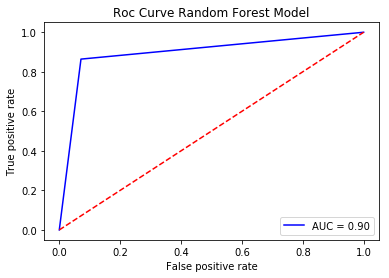

In [17]:
plt.title('Roc Curve Random Forest Model')
plt.plot(false_positive_rate,true_positive_rate,'b', label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

##### Feature Importance in this model

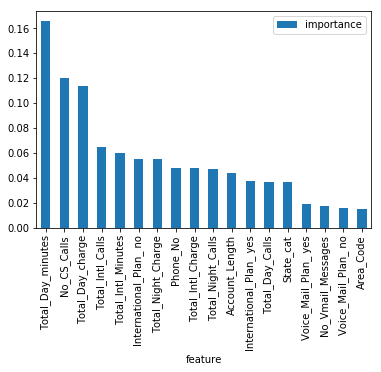

In [18]:
rfc = RandomForestClassifier()
rfc.fit(X,Y)
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

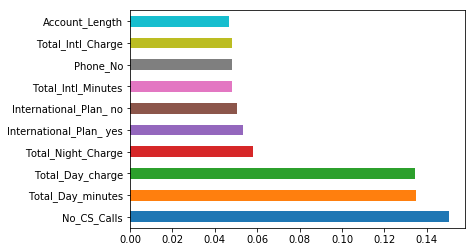

In [19]:
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')